# 3-4-ChIP-Analysis-R
Jakke Neiro$^1$
1. Aboobaker laboratory, Department of Zoology, University of Oxford

## Contents of notebook
* 1. Introduction
* 2. Genome track
* 3. Quality metrics
    * 3.1 Normalized strand coefficient (NSC)
    * 3.2 Background uniformity (Bu)
* 4. Coverage plots
    * 4.1 H3K27ac signal at TSS
    * 4.2 H3K4me1 signal at TSS
    * 4.3 H3K27ac signal at H3K27ac peaks
    * 4.4 H3K4me1 signal at H3K4me1 peaks
* 5. Correlation
    * 5.1 Correlation at TSS
    * 5.2 Correlation at peaks
* 6. Peak proportions and distribution
    * 6.1 Peak proportions
    * 6.2 Peak distribution

Files:
* Input: X1-H3K27ac-meanrep23log2.bw, 
* Output: 
    * Fig 3-4-x Scatterplot of H3K27ac and H3K4me1 signal at peak sites

# 1. Introduction

# 2. Genome track

In [2]:
library(GenomicFeatures)
library(Gviz)
library(rtracklayer)

In [3]:
k27ac_mean = import("/hydra/chip_neiro/k27ac/X1-H3K27ac-meanrep23log2.bw")

In [4]:
options(ucscChromosomeNames=FALSE)
k27ac_track = DataTrack(k27ac_mean, type = "l", name="H3K27ac")

In [5]:
txdb = makeTxDbFromGFF("/hydra/sexual_genome_annotation_files/ncrna_Neiro/stringtie.Bioconductor.gtf", format = "gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



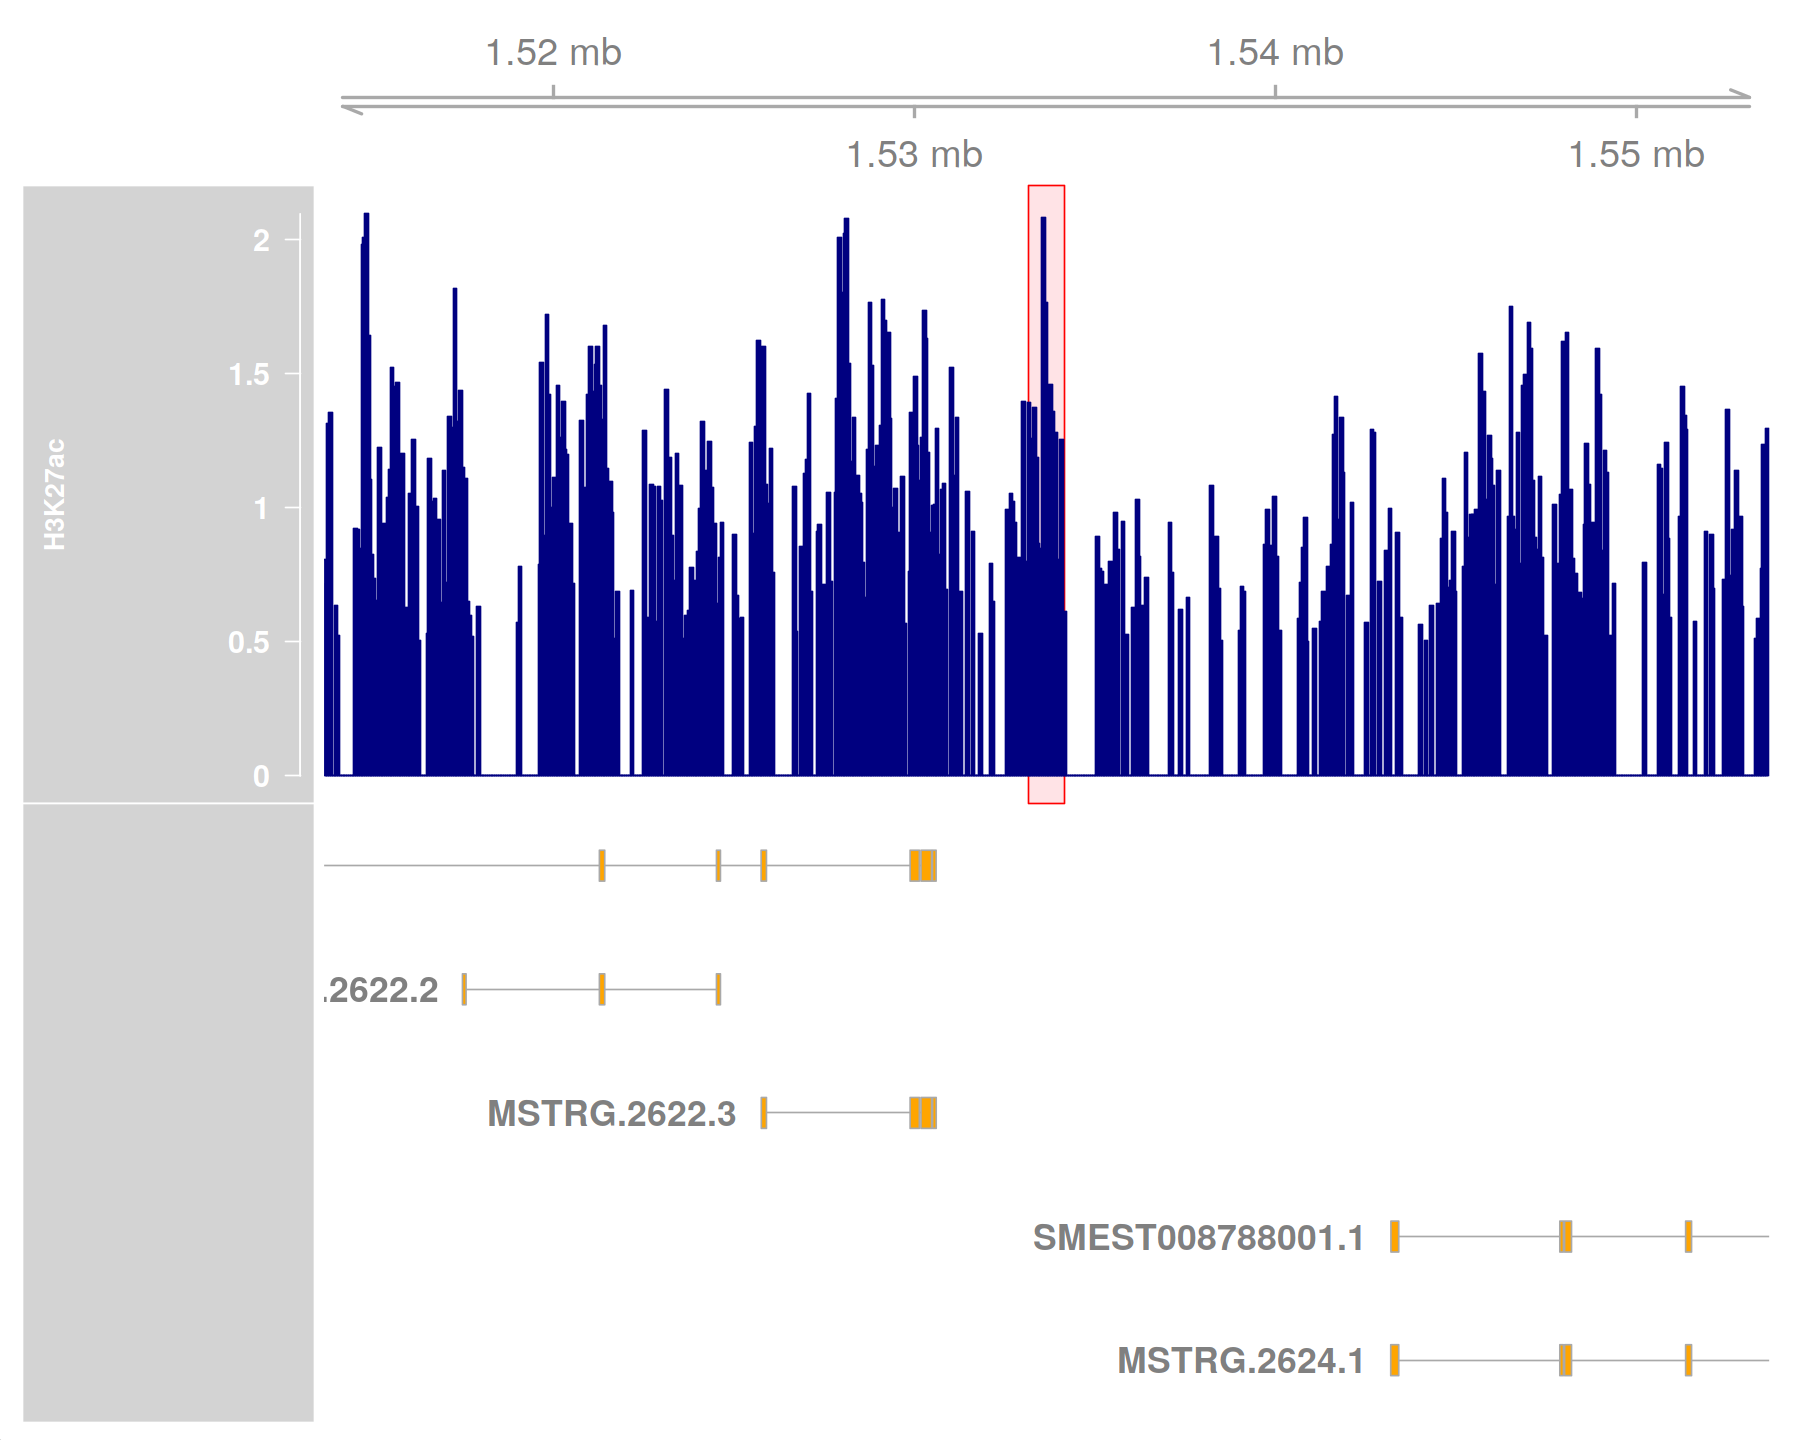

In [10]:
options(ucscChromosomeNames=FALSE)
gtrack <- GenomeAxisTrack(cex=2.25)
txTr <- GeneRegionTrack(txdb, chromosome = "dd_Smes_g4_12", fill="orange", name=" ", fontsize=20)
ht <- HighlightTrack(trackList = list(k27ac_track),start = 1533650-500, width = 1000,
                    chromosome = "dd_Smes_g4_12")
options(repr.plot.width = 15, repr.plot.height = 12)
plotTracks(c(gtrack, ht, txTr), transcriptAnnotation = "symbol", shape = "arrow", chromosome="dd_Smes_g4_12", from=1533650-20000, to=1533650+20000, cex.group=1.75, type="hist", window = -1, windowSize = 1, 
                       fill.histogram = "navyblue", col.histogram = "navyblue", cex.axis=1.5, cex.title=1.3, transformation = function(x) { x[x < 0.5] <- 0; x })

# 3. Quality metrics

The quality metrics were calculated with SSP (https://github.com/rnakato/SSP) and reference values were taken from (https://www.sciencedirect.com/science/article/pii/S1046202320300591).

## 3.1 Normalized strand coefficient (NSC)

The NSC value was calculated for H3K27ac samples:  

In [5]:
nsc_27ac = data.frame(matrix(ncol = 6, nrow = 450))
for (i in 1:450){
    rep1L1 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L1_ssp/h3k27ac_re1L1_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep1L2 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L2_ssp/h3k27ac_re1L2_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep1L3 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L3_ssp/h3k27ac_re1L3_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep1L4 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L4_ssp/h3k27ac_re1L4_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep2 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_rep2_ssp/h3k27ac_rep2_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep3 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_rep3_ssp/h3k27ac_rep3_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    nsc_4 = as.numeric(strsplit(rep1L4[1,1], "\t")[[1]][2])
    nsc_2 = as.numeric(strsplit(rep1L2[1,1], "\t")[[1]][2])
    if (nsc_4 == "Inf"){
        nsc_4 = 1000
        
    }
    if (nsc_2 == "Inf"){
        nsc_2 = 1000
        
    }
    nsc_27ac[i, 1] = as.numeric(strsplit(rep1L1[1,1], "\t")[[1]][2])
    nsc_27ac[i, 2] = nsc_2
    nsc_27ac[i, 3] = as.numeric(strsplit(rep1L3[1,1], "\t")[[1]][2])
    nsc_27ac[i, 4] = nsc_4
    nsc_27ac[i, 5] = as.numeric(strsplit(rep2[1,1], "\t")[[1]][2])
    nsc_27ac[i, 6] = as.numeric(strsplit(rep3[1,1], "\t")[[1]][2])
}

In [2]:
sizes = read.table("/hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome")

In [6]:
weighted.mean(nsc_27ac$X1, sizes$V2[1:450], na.rm=TRUE)

[1] 4.14874

In [7]:
weighted.mean(nsc_27ac$X2, sizes$V2[1:450], na.rm=TRUE)

[1] 4.164966

In [8]:
weighted.mean(nsc_27ac$X3, sizes$V2[1:450], na.rm=TRUE)

[1] 4.211878

In [9]:
weighted.mean(nsc_27ac$X4, sizes$V2[1:450], na.rm=TRUE)

[1] 4.218152

In [10]:
weighted.mean(nsc_27ac$X5, sizes$V2[1:450], na.rm=TRUE)

[1] 2.58187

In [11]:
weighted.mean(nsc_27ac$X6, sizes$V2[1:450], na.rm=TRUE)

[1] 2.949407

For human samples, the NSC value ranges between 1 and 20. The value should be more than 1.5. 

The NSC value was calculated for H3K4me1 samples.

In [12]:
nsc_k4me1 = data.frame(matrix(ncol = 2, nrow = 450))
for (i in 1:450){
    rep1 = read.csv(paste("/hydra/chip_neiro/k4me1/h3k4me1_rep1_ssp/h3k4me1_rep1_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep2 = read.csv(paste("/hydra/chip_neiro/k4me1/h3k4me1_rep2_ssp/h3k4me1_rep2_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    nsc_k4me1[i, 1] = as.numeric(strsplit(rep1[1,1], "\t")[[1]][2])
    nsc_k4me1[i, 2] = as.numeric(strsplit(rep2[1,1], "\t")[[1]][2])
}

In [13]:
weighted.mean(nsc_k4me1$X1, sizes$V2[1:450], na.rm=TRUE)

[1] 2.670484

In [14]:
weighted.mean(nsc_k4me1$X2, sizes$V2[1:450], na.rm=TRUE)

[1] 2.714198

## 3.2 Background uniformity (Bu)

The Bu value was calculated for H3K27ac samples:

In [11]:
bu_k27ac = data.frame(matrix(ncol = 6, nrow = 450))
for (i in 1:450){
    rep1L1 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L1_ssp/h3k27ac_re1L1_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep1L2 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L2_ssp/h3k27ac_re1L2_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep1L3 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L3_ssp/h3k27ac_re1L3_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep1L4 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_re1L4_ssp/h3k27ac_re1L4_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep2 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_rep2_ssp/h3k27ac_rep2_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep3 = read.csv(paste("/hydra/chip_neiro/k27ac/h3k27ac_rep3_ssp/h3k27ac_rep3_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    bu_4 = as.numeric(strsplit(rep1L4[6,1], "\t")[[1]][2])
    bu_1 = as.numeric(strsplit(rep1L1[6,1], "\t")[[1]][2])
    bu_2 = as.numeric(strsplit(rep1L2[6,1], "\t")[[1]][2])
    bu_3 = as.numeric(strsplit(rep1L3[6,1], "\t")[[1]][2])
    bu_5 = as.numeric(strsplit(rep2[6,1], "\t")[[1]][2])
    bu_6 = as.numeric(strsplit(rep3[6,1], "\t")[[1]][2])
    if (bu_4 == "Inf"){
        bu_4 = 10
        
    }
    if (bu_2 == "Inf"){
        bu_2 = 10
        
    }
    if (bu_5 == "Inf"){
        bu_5 = 10
        
    }
    if (bu_3 == "Inf"){
        bu_3 = 10
        
    }
    if (bu_1 == "Inf"){
        bu_1 = 10
        
    }
    if (bu_6 == "Inf"){
        bu_6 = 10
        
    }
    bu_k27ac[i, 1] = bu_1
    bu_k27ac[i, 2] = bu_2
    bu_k27ac[i, 3] = bu_3
    bu_k27ac[i, 4] = bu_4
    bu_k27ac[i, 5] = bu_5
    bu_k27ac[i, 6] = bu_6
}

In [13]:
sizes = read.table("/hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome")

In [14]:
weighted.mean(bu_k27ac$X1, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9293058

In [15]:
weighted.mean(bu_k27ac$X2, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9249838

In [16]:
weighted.mean(bu_k27ac$X3, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9215846

In [17]:
weighted.mean(bu_k27ac$X4, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9213791

In [18]:
weighted.mean(bu_k27ac$X5, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9257102

In [19]:
weighted.mean(bu_k27ac$X6, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9129538

The Bu value was calculated for H3K4me1 samples:

In [20]:
bu_k4me1 = data.frame(matrix(ncol = 2, nrow = 450))
for (i in 1:450){
    rep1 = read.csv(paste("/hydra/chip_neiro/k4me1/h3k4me1_rep1_ssp/h3k4me1_rep1_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    rep2 = read.csv(paste("/hydra/chip_neiro/k4me1/h3k4me1_rep2_ssp/h3k4me1_rep2_ssp.jaccard.dd_Smes_g4_", i, ".csv", sep=""), head=FALSE)
    bu_1 = as.numeric(strsplit(rep1[6,1], "\t")[[1]][2])
    bu_2 = as.numeric(strsplit(rep2[6,1], "\t")[[1]][2])
    if (bu_2 == "Inf"){
        bu_2 = 10
        
    }
    if (bu_1 == "Inf"){
        bu_1 = 10
        
    }
    bu_k4me1[i, 1] = bu_1
    bu_k4me1[i, 2] = bu_2
}

In [22]:
weighted.mean(bu_k4me1$X1, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9453908

In [23]:
weighted.mean(bu_k4me1$X2, sizes$V2[1:450], na.rm=TRUE)

[1] 0.9472306

For human samples, the Bu value is higher than 0.8.

# 4. Coverage plots

## 4.1 H3K27ac signal at TSS

In [15]:
k27actss = read.table("/hydra/chip_neiro/k27ac/k27acpeakaroundtss_july21.tab", skip=3)

In [16]:
k27actss_mean = apply(k27actss, 2, mean, na.rm=TRUE)

In [17]:
confint_lower = function(vector){
    return(t.test(vector)[[4]][1])
}
confint_upper = function(vector){
    return(t.test(vector)[[4]][2])
}

In [26]:
k27actss_lower = apply(k27actss, 2, confint_lower)
k27actss_upper = apply(k27actss, 2, confint_upper)

In [20]:
position = seq(-1990,2000,10)
length(seq(-1990,2000,10))

[1] 400

In [27]:
value = k27actss_mean
lower = k27actss_lower
upper = k27actss_upper
cell_positions = rep(position, 1)
df = data.frame(value=value, position=cell_positions, lower=lower, upper=upper)

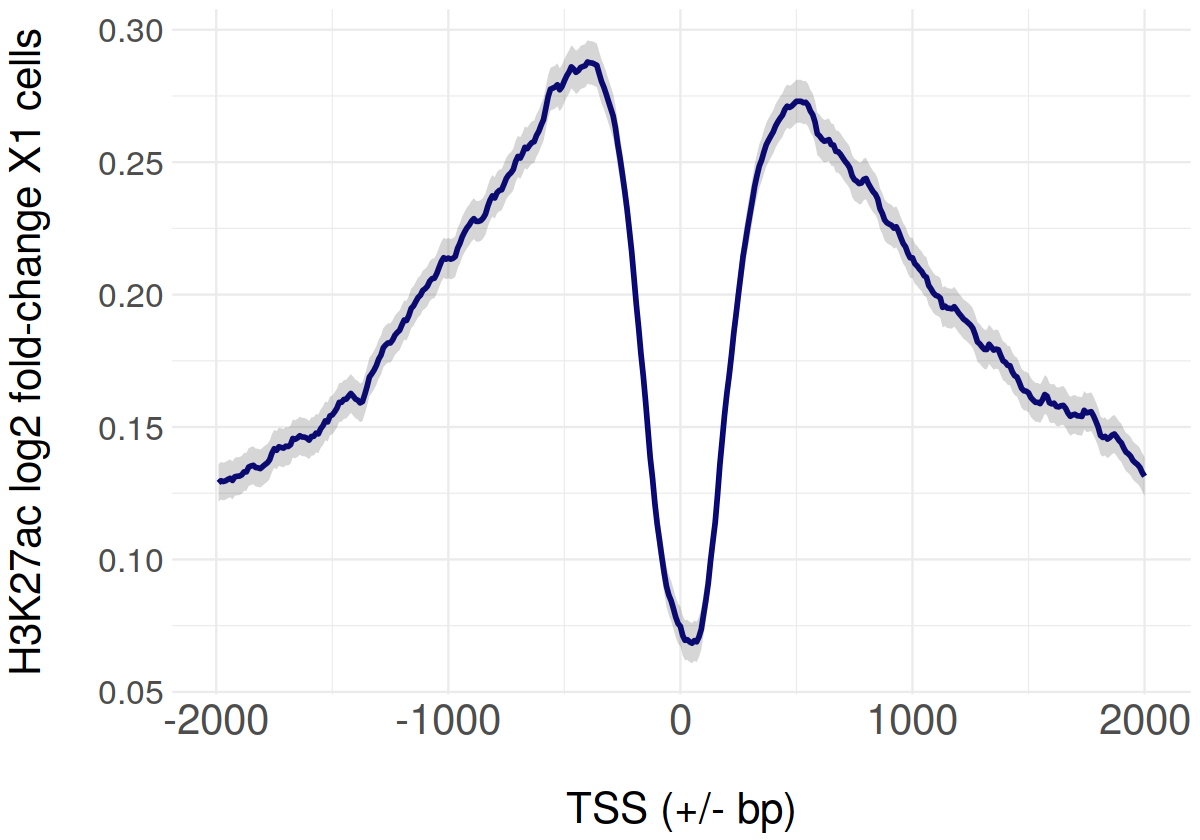

In [28]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 7)
p = ggplot(df, aes(x=position, y=value)) + geom_line(size=1.2, col="navyblue")
p = p + geom_ribbon(aes(ymin=lower, ymax=upper), linetype=1, alpha=0.2)
p = p + theme_minimal() + scale_colour_brewer(name="Enrichment group", palette="Spectral")
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=20), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlab("\nTSS (+/- bp)") + ylab("H3K27ac log2 fold-change X1 cells\n")
p

## 4.2 H3K4me1 signal at TSS

## 4.3 H3K27ac signal at H3K27ac peaks

In [1]:
k27acpeak = read.table("/hydra/chip_neiro/k27ac/k27acpeak.tab", skip=3)

In [48]:
k27acpeak_mean = apply(k27acpeak, 2, mean, na.rm=TRUE)

In [88]:
k27acpeak_lower = apply(k27acpeak, 2, confint_lower)
k27acpeak_upper = apply(k27acpeak, 2, confint_upper)

In [30]:
position = seq(-2990,3000,10)
length(seq(-2990,3000,10))

[1] 600

In [89]:
value = k27acpeak_mean
lower = k27acpeak_lower
upper = k27acpeak_upper
cell_positions = rep(position, 1)
df = data.frame(value=value, position=cell_positions, lower=lower, upper=upper)

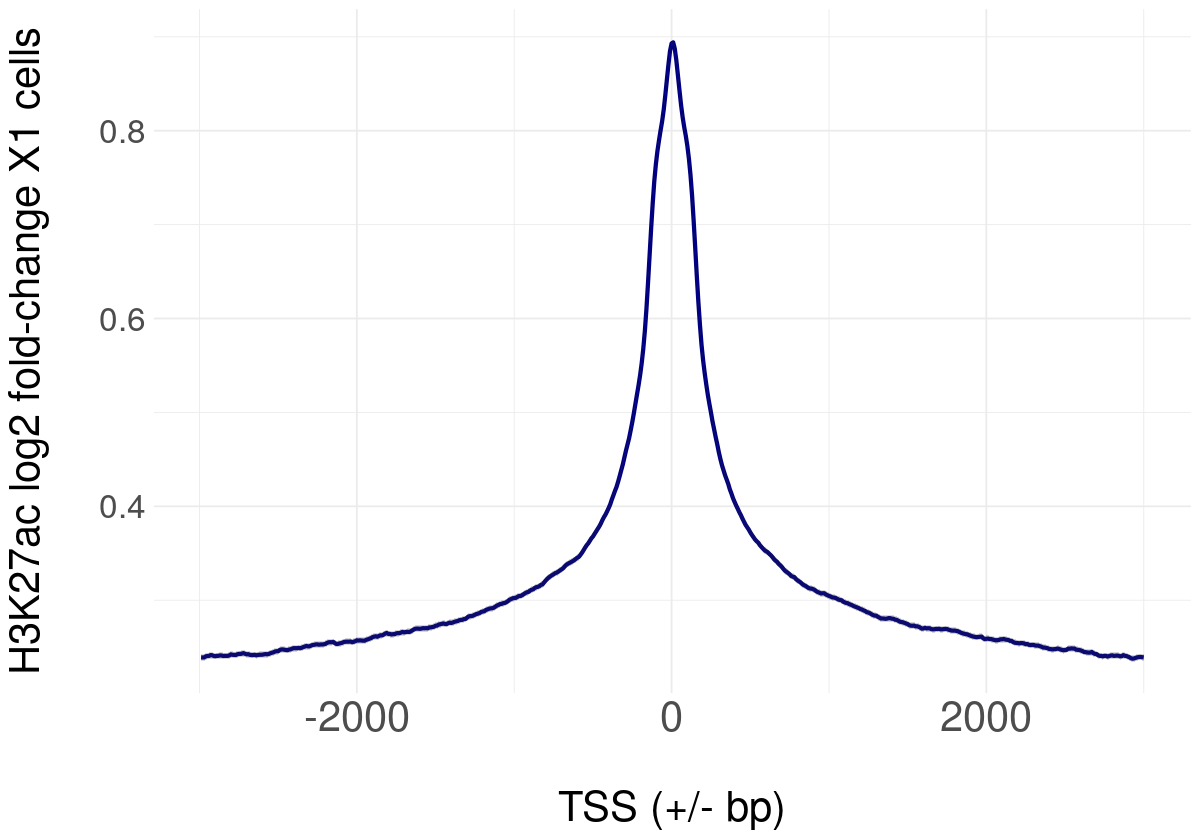

In [90]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 7)
p = ggplot(df, aes(x=position, y=value)) + geom_line(size=1.2, col="navyblue")
p = p + geom_ribbon(aes(ymin=lower, ymax=upper), linetype=1, alpha=0.2)
p = p + theme_minimal() + scale_colour_brewer(name="Enrichment group", palette="Spectral")
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=20), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlab("\nTSS (+/- bp)") + ylab("H3K27ac log2 fold-change X1 cells\n")
p

In [43]:
k27acpeak = as.matrix(k27acpeak)

In [35]:
ncol(k27acpeak)

[1] 600

In [44]:
attr(k27acpeak, "upstream_index") = 1:300
attr(k27acpeak, "target_index") = integer(0)
attr(k27acpeak, "downstream_index") = 301:600
attr(k27acpeak, "extend") = c(1000, 1000)
class(k27acpeak) = c("normalizedMatrix", "matrix")

In [27]:
library(EnrichedHeatmap)

In [1]:
#EnrichedHeatmap(k27acpeak, name = "H3K4me3")

In [ ]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 2.8)
df = data.frame(class=factor(c("a", "b", "c"), levels=c("a", "b", "c")), value=c(7835, 6033, 37280), id = rep(" ", 3))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=18), axis.text.y=element_text(size=18), axis.text.x=element_text(size=18), axis.title=element_text(size=18), legend.title=element_text(size=18), legend.text=element_text(size=18))
p = p + scale_fill_manual(name=" ", labels=c("K4me1", "K4me1 & K27ac", "K27ac"), values=c("lightblue", "orange", "navyblue"))
p = p + ylab(" ") + xlab(" ") 
p = p + coord_flip()
p = p + geom_text(aes(label=c("37280\n(73%)"), y=c(0.4)), size = 7, col="white")
p = p + geom_text(aes(label=c("6033\n(12%)"), y=c(0.785)), size = 7, col="white")
p = p + geom_text(aes(label=c("7835\n(15%)"), y=c(0.925)), size = 7, col="white")
#p = p + geom_text(aes(label=c("Fisher:\np = 0.003"), y=c(0.9)), size = 6)
p

## 4.4 H3K4me1 signal at H3K4me1 peaks

# 5. Correlation

## 5.1 Correlation at TSS

In [2]:
tsscorr = read.csv("/hydra/chip_neiro/tsscorr_july21.csv")

In [8]:
cor(tsscorr$k27ac, tsscorr$k4me1, use="complete.obs", method="spearman")

[1] 0.30382

In [10]:
summary(lm(tsscorr$k4me1 ~ tsscorr$k27ac))


Call:
lm(formula = tsscorr$k4me1 ~ tsscorr$k27ac)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71337 -0.11684 -0.02023  0.10313  1.02113 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.064973   0.001583   41.05   <2e-16 ***
tsscorr$k27ac 0.292983   0.005007   58.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1868 on 22189 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1337,	Adjusted R-squared:  0.1336 
F-statistic:  3424 on 1 and 22189 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1 rows containing non-finite values (stat_density2d).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


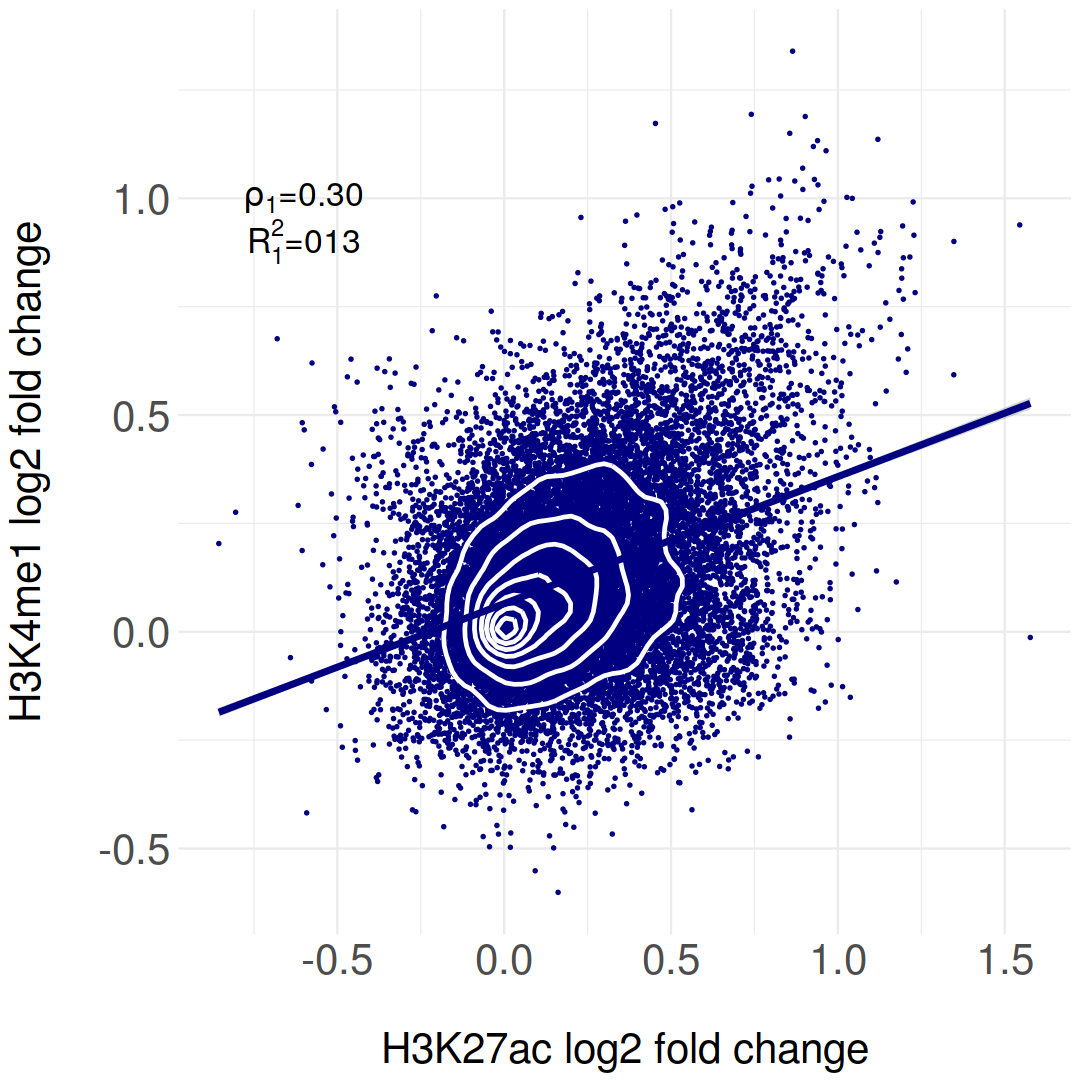

In [13]:
library(ggplot2)
library(dplyr)
options(repr.plot.width = 9, repr.plot.height = 9)
p = ggplot(tsscorr, aes(x=k27ac, y=k4me1)) + geom_point(size=0.5, color="navyblue")
p = p + theme_minimal()
p = p + stat_density_2d(col="white", size=1)
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25), legend.position="top")
p = p + xlab("\nH3K27ac log2 fold change") + ylab("H3K4me1 log2 fold change\n")
p = p +geom_smooth(method = "lm", size=1.5, col="navyblue")
p = p + annotate("text", x = -0.6, y = 1.0, parse = TRUE, label = as.character(expression(rho[1]*"=0.30")), size=7)
p = p + annotate("text", x = -0.6, y = 0.9, parse = TRUE, label = as.character(expression(R[1]^{2}*"=013")), size=7)
p

## 5.2 Correlation at peaks

In [1]:
k4me1corr = read.csv("/hydra/chip_neiro/k4me1corr_july21.csv")

In [5]:
nrow(k4me1corr)

[1] 51213

In [2]:
chip_subset = subset(k4me1corr, k4me1corr$Enhancer == "b")

In [12]:
nrow(chip_subset)

[1] 5005

In [13]:
cor(chip_subset$k27ac, chip_subset$k4me1, use="complete.obs", method="spearman")

[1] 0.3971968

In [14]:
cor(k4me1corr$k27ac, k4me1corr$k4me1, use="complete.obs", method="spearman")

[1] -0.001366188

In [28]:
summary(lm(k4me1corr$k4me1 ~ k4me1corr$k27ac))


Call:
lm(formula = k4me1corr$k4me1 ~ k4me1corr$k27ac)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2957 -0.2784 -0.0230  0.2650  1.3387 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.3400216  0.0034877  97.491   <2e-16 ***
k4me1corr$k27ac 0.0005566  0.0052106   0.107    0.915    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3552 on 51211 degrees of freedom
Multiple R-squared:  2.228e-07,	Adjusted R-squared:  -1.93e-05 
F-statistic: 0.01141 on 1 and 51211 DF,  p-value: 0.9149


In [29]:
summary(lm(chip_subset$k4me1 ~ chip_subset$k27ac))


Call:
lm(formula = chip_subset$k4me1 ~ chip_subset$k27ac)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82041 -0.15081 -0.00275  0.15440  0.88200 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.43342    0.01045   41.47   <2e-16 ***
chip_subset$k27ac  0.39049    0.01319   29.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.235 on 5003 degrees of freedom
Multiple R-squared:  0.149,	Adjusted R-squared:  0.1488 
F-statistic: 875.9 on 1 and 5003 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



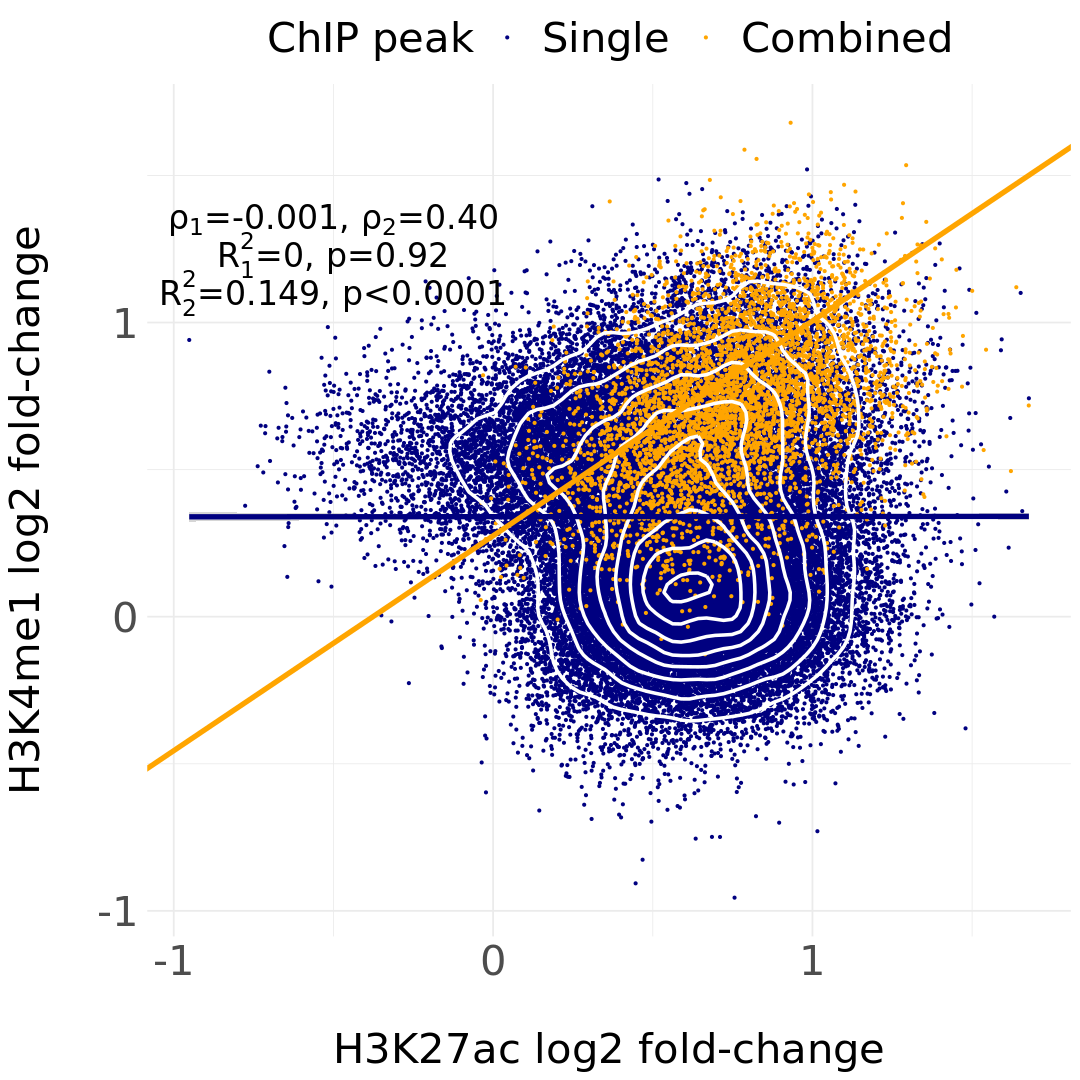

In [4]:
library(ggplot2)
library(dplyr)
options(repr.plot.width = 9, repr.plot.height = 9)
p = ggplot(k4me1corr %>% arrange(Enhancer), aes(x=k27ac, y=k4me1, col=Enhancer)) + geom_point(size=0.5)
p = p + theme_minimal()
p = p + stat_density_2d(col="white", size=1)
p = p + scale_colour_manual(name="ChIP peak", labels=c("Single", "Combined"), values=c("navyblue", "orange"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25), legend.position="top")
p = p + xlab("\nH3K27ac log2 fold-change") + ylab("H3K4me1 log2 fold-change\n")
p = p +geom_smooth(method = "lm", size=1.5, col="navyblue")
p = p + geom_abline(intercept = 0.2750 , slope = 0.7305, col="orange", size=1.5)
p = p + annotate("text", x = -0.5, y = 1.35, parse = TRUE, label = as.character(expression(rho[1]*"=-0.001, "*rho[2]*"=0.40")), size=7)
p = p + annotate("text", x = -0.5, y = 1.23, parse = TRUE, label = as.character(expression(R[1]^{2}*"=0, p=0.92")), size=7)
p = p + annotate("text", x = -0.5, y = 1.1, parse = TRUE, label = as.character(expression(R[2]^{2}*"=0.149, p<0.0001")), size=7)
p

**Fig 3-4-x** *Scatterplot of H3K27ac and H3K4me1 signal at peak sites*

## 6. Peak proportions and distribution

* Combined peaks: 5529
* H3K4me1 peaks: 13868
* H3K27ac peaks: 37345

In [34]:
37345-5529
13868-5529

[1] 31816

[1] 8339

In [5]:
31816/(31816+5529+8339)
5529/(31816+5529+8339)

[1] 0.6964364

[1] 0.1210271

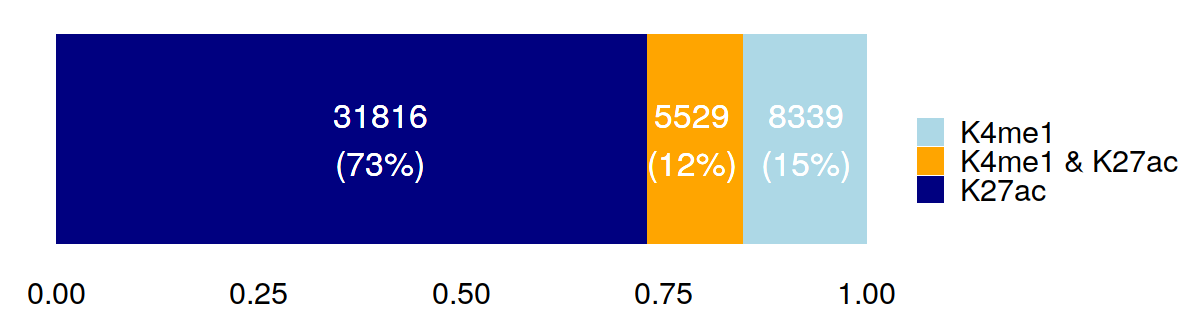

In [35]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 2.8)
df = data.frame(class=factor(c("a", "b", "c"), levels=c("a", "b", "c")), value=c(7835, 6033, 37280), id = rep(" ", 3))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=18), axis.text.y=element_text(size=18), axis.text.x=element_text(size=18), axis.title=element_text(size=18), legend.title=element_text(size=18), legend.text=element_text(size=18))
p = p + scale_fill_manual(name=" ", labels=c("K4me1", "K4me1 & K27ac", "K27ac"), values=c("lightblue", "orange", "navyblue"))
p = p + ylab(" ") + xlab(" ") 
p = p + coord_flip()
p = p + geom_text(aes(label=c("31816\n(70%)"), y=c(0.4)), size = 7, col="white")
p = p + geom_text(aes(label=c("5529\n(12%)"), y=c(0.785)), size = 7, col="white")
p = p + geom_text(aes(label=c("8339\n(15%)"), y=c(0.925)), size = 7, col="white")
#p = p + geom_text(aes(label=c("Fisher:\np = 0.003"), y=c(0.9)), size = 6)
p

In [32]:
library(ChIPpeakAnno)
library(GenomicFeatures)

# 7. Annotation of ChIP peaks to genes

In [2]:
library(ChIPseeker)
library(GenomicFeatures)
library(rtracklayer)

In [3]:
txdb_final = makeTxDbFromGFF("/hydra/neiro_bam/stringtie_merged_R.gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



## 7.1 Combined peaks

In [ ]:
chip_peaks <- readPeakFile("/hydra/enhancer_regions/chip_summits_july21.bed")

In [ ]:
chip_anno <- annotatePeak(chip_peaks, tssRegion=c(-1000, 1000), TxDb=txdb_final)

In [ ]:
enhancer_chip = as.data.frame(chip_anno)

In [ ]:
enhancer_chip = subset(enhancer_chip, grepl("Exon", enhancer_chip$annotation) == FALSE)

In [ ]:
write.csv(enhancer_chip, "/hydra/enhancer_regions/enhancer_annotation_july21.csv", row.names = FALSE)

In [2]:
nrow(read.csv("/hydra/enhancer_regions/enhancer_annotation_july21.csv"))

[1] 4326

## 7.2 Random peaks

In [4]:
random_peaks <- readPeakFile("/hydra/enhancer_regions/random_peaks.bed")

In [6]:
#random_anno <- annotatePeak(random_peaks, tssRegion=c(-1000, 1000), TxDb=txdb_final)

In [8]:
enhancer_random = as.data.frame(random_anno)

In [9]:
enhancer_random = subset(enhancer_random, grepl("Exon", enhancer_random$annotation) == FALSE)

In [10]:
write.csv(enhancer_random, "/hydra/enhancer_regions/enhancer_random_july21.csv", row.names = FALSE)

In [11]:
nrow(read.csv("/hydra/enhancer_regions/enhancer_random_july21.csv"))

[1] 9676

# FINNISH